In [1]:
import pandas as pd
df=pd.read_csv('airline review.csv')
df

airline_name                                            content  \
0     air-canada-rouge  Flew to Lisbon from Toronto July 27 2015, plan...   
1     air-canada-rouge  We are a family of 5 who had booked a flight f...   
2     air-canada-rouge  I checked our family of 6 in online before we ...   
3     air-canada-rouge  It was a 12 hour flight from Vancouver to Osak...   
4     air-canada-rouge  Done all necessary procedure to make sure my g...   
...                ...                                                ...   
2356   united-airlines  Just returned from a 3 week trip LHR-ORD-SEA r...   
2357   united-airlines  Flew LAX-SFO-ORD-LAX last week in First. Had a...   
2358   united-airlines  ORD-FLL on 18 January. Paid for upgrade to 1st...   
2359   united-airlines  IAD to DEN. Economy class on a 757. On time fo...   
2360   united-airlines  I personally have had few problems with them o...   

      recommended  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
2356            1  
2357            1  
2358            1  
2359            1  
2360            1  

[2361 rows x 3 columns]

In [2]:
df.recommended[df.recommended == 0] = 'neg'
df.recommended[df.recommended == 1] = 'pos'
df

C:\Users\wingy\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


airline_name                                            content  \
0     air-canada-rouge  Flew to Lisbon from Toronto July 27 2015, plan...   
1     air-canada-rouge  We are a family of 5 who had booked a flight f...   
2     air-canada-rouge  I checked our family of 6 in online before we ...   
3     air-canada-rouge  It was a 12 hour flight from Vancouver to Osak...   
4     air-canada-rouge  Done all necessary procedure to make sure my g...   
...                ...                                                ...   
2356   united-airlines  Just returned from a 3 week trip LHR-ORD-SEA r...   
2357   united-airlines  Flew LAX-SFO-ORD-LAX last week in First. Had a...   
2358   united-airlines  ORD-FLL on 18 January. Paid for upgrade to 1st...   
2359   united-airlines  IAD to DEN. Economy class on a 757. On time fo...   
2360   united-airlines  I personally have had few problems with them o...   

     recommended  
0            neg  
1            neg  
2            neg  
3            neg  
4            neg  
...          ...  
2356         pos  
2357         pos  
2358         pos  
2359         pos  
2360         pos  

[2361 rows x 3 columns]

In [3]:
# review count for each airline
df.groupby(['airline_name','recommended']).count()

content
airline_name     recommended         
air-canada-rouge neg              608
                 pos               95
british-airways  neg              364
                 pos              491
united-airlines  neg              598
                 pos              205

In [4]:
# pull out all the content
canada=df.loc[df['airline_name']=="air-canada-rouge",['content','recommended']]
british=df.loc[df['airline_name']=="british-airways",['content','recommended']]
united=df.loc[df['airline_name']=="united-airlines",['content','recommended']]
canada.head()

content recommended
0  Flew to Lisbon from Toronto July 27 2015, plan...         neg
1  We are a family of 5 who had booked a flight f...         neg
2  I checked our family of 6 in online before we ...         neg
3  It was a 12 hour flight from Vancouver to Osak...         neg
4  Done all necessary procedure to make sure my g...         neg

In [5]:
# turn into list of list
list_1=canada.values.tolist()
list_2=british.values.tolist()
list_3=united.values.tolist()
list_2[:3]

[["Considering BA's fares were high to begin with and you had to purchase your seats to secure in advance we still booked on the advice of our British son in law. Plane is so large takes a long time to board and disembark. We flew Premium Economy, seats are bigger and have leg room but they're not comfortable for some reason. Flight crew was fine and professional. Inflight entertainment was fine but new movie selection was small. Cabin and seats were clean and neat. Inflight kit consisted of socks, ear plugs, mask, pen and tiny toothpaste and brush.  They offer pillows and blankets. But although the seats are wider, they weren't easy to get in and out of, and not just us a number of passengers contorted just to get out. The meals were fine, though served on a tiny tray loaded with food, the meal was pretty good. Not a lot of choices, to London, beef or pasta, from London back to LA, it was beef or fish. It was hot and there was a lot of food, a salad, small  cheese and  crackers. Roll 

In [6]:
!pip install wordcloud
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import nltk
import string
import random
import re

In [7]:
#turn into list of tuple
stopword=stopwords.words("english")
canada_t=[(a, b) for a, b in list_1]
british_t=[(a, b) for a, b in list_2]
united_t=[(a, b) for a, b in list_3 ]

canada_word_t=[(nltk.word_tokenize(x),y)for x,y in canada_t]
british_word_t=[(nltk.word_tokenize(x),y)for x,y in british_t]
united_word_t=[(nltk.word_tokenize(x),y)for x,y in united_t]

print(canada_word_t[:1])



[(['Flew', 'to', 'Lisbon', 'from', 'Toronto', 'July', '27', '2015', ',', 'plane', 'was', 'a', 'older', 'model', ',', 'no', 'entertainment', 'system', '.', 'We', 'had', 'to', 'download', 'an', 'app', 'on', 'the', 'iPad', 'or', 'if', 'you', 'do', "n't", 'have', 'a', 'iPad', 'the', 'airline', 'rents', 'them', 'for', '$', '10', '.', 'Movies', 'are', 'mostly', 'older', 'ones', ',', 'which', 'I', 'was', 'shocked', 'to', 'see', ',', 'since', 'I', "'ve", 'flown', 'overseas', 'many', 'times', '.', 'The', 'leg', 'room', 'seems', 'tight', 'compared', 'to', 'other', 'overseas', 'flights', 'I', "'ve", 'taken', '.', 'Crew', 'were', 'very', 'nice', '.', 'I', "'m", 'Canadian', ',', 'and', 'very', 'disappointed', 'in', 'my', 'countries', 'main', 'airliner', '.', 'Long', 'ways', 'to', 'go', 'to', 'be', 'a', 'premium', 'airline', '.'], 'neg')]


In [8]:
# get the most common words for each each airline

stopword=stopwords.words("english")

def get_review_words(review):
    review_words=[]
    for w in review:
        review_words.extend(w[0])
    review_words=[w for w in review_words if not w.lower() in stopword and not w in string.punctuation and w.isalpha() ]
    return review_words


canada_common=nltk.FreqDist(get_review_words(canada_word_t)).most_common()[:100]
british_common=nltk.FreqDist(get_review_words(british_word_t)).most_common()[:100]
united_common=nltk.FreqDist(get_review_words(united_word_t)).most_common()[:100]
most_freq_air1=[w[0] for w in canada_common]
most_freq_air2=[w[0] for w in british_common]
most_freq_air3=[w[0] for w in united_common]
print(most_freq_air1)


['flight', 'Rouge', 'Air', 'Canada', 'seat', 'seats', 'AC', 'entertainment', 'Toronto', 'service', 'would', 'fly', 'back', 'room', 'time', 'airline', 'flights', 'plane', 'could', 'leg', 'one', 'get', 'even', 'food', 'hours', 'front', 'class', 'never', 'experience', 'crew', 'return', 'us', 'flew', 'good', 'uncomfortable', 'like', 'staff', 'flying', 'business', 'hour', 'way', 'first', 'trip', 'economy', 'attendants', 'passengers', 'cramped', 'booked', 'got', 'people', 'regular', 'system', 'knees', 'rouge', 'movies', 'use', 'last', 'iPad', 'worst', 'much', 'Vegas', 'cabin', 'space', 'paid', 'seating', 'old', 'app', 'Vancouver', 'little', 'long', 'inflight', 'new', 'pay', 'Flight', 'told', 'extra', 'ever', 'legroom', 'years', 'Flew', 'another', 'many', 'Premium', 'better', 'aircraft', 'travel', 'know', 'also', 'comfortable', 'legs', 'cost', 'price', 'say', 'bad', 'flown', 'poor', 'full', 'take', 'unless', 'made']


In [9]:
#get the tag for label
pos_air1=[nltk.pos_tag(x) for x,y in canada_word_t]
pos_air2=[nltk.pos_tag(x) for x,y in british_word_t]
pos_air3=[nltk.pos_tag(x) for x,y in united_word_t]

print(pos_air1[:3])


[[('Flew', 'NNP'), ('to', 'TO'), ('Lisbon', 'NNP'), ('from', 'IN'), ('Toronto', 'NNP'), ('July', 'NNP'), ('27', 'CD'), ('2015', 'CD'), (',', ','), ('plane', 'NN'), ('was', 'VBD'), ('a', 'DT'), ('older', 'JJR'), ('model', 'NN'), (',', ','), ('no', 'DT'), ('entertainment', 'NN'), ('system', 'NN'), ('.', '.'), ('We', 'PRP'), ('had', 'VBD'), ('to', 'TO'), ('download', 'VB'), ('an', 'DT'), ('app', 'NN'), ('on', 'IN'), ('the', 'DT'), ('iPad', 'NN'), ('or', 'CC'), ('if', 'IN'), ('you', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('have', 'VB'), ('a', 'DT'), ('iPad', 'NN'), ('the', 'DT'), ('airline', 'NN'), ('rents', 'VBZ'), ('them', 'PRP'), ('for', 'IN'), ('$', '$'), ('10', 'CD'), ('.', '.'), ('Movies', 'NNS'), ('are', 'VBP'), ('mostly', 'RB'), ('older', 'JJR'), ('ones', 'NNS'), (',', ','), ('which', 'WDT'), ('I', 'PRP'), ('was', 'VBD'), ('shocked', 'VBN'), ('to', 'TO'), ('see', 'VB'), (',', ','), ('since', 'IN'), ('I', 'PRP'), ("'ve", 'VBP'), ('flown', 'VBN'), ('overseas', 'RB'), ('many', 'JJ'), (

In [10]:
##Get the top 100 JJ words from each airline:

def pick_JJ_words(pos):
    jjlist=[]
    for i in pos:
        jjs=[x[0].lower() for x in i if 'JJ' in x[1] and len(x[0])>=3 and x[0].isalpha()]
        jjlist+=jjs
    jjfrequency=nltk.FreqDist(jjlist)
    freqjj=[x for x,y in jjfrequency.most_common(100)]
    return freqjj



most_common_JJ_air1=pick_JJ_words(pos_air1)
most_common_JJ_air2=pick_JJ_words(pos_air2)
most_common_JJ_air3=pick_JJ_words(pos_air3)
print(most_common_JJ_air1)

['other', 'good', 'same', 'uncomfortable', 'first', 'more', 'regular', 'last', 'worst', 'old', 'new', 'many', 'little', 'inflight', 'extra', 'comfortable', 'own', 'only', 'full', 'bad', 'poor', 'terrible', 'small', 'long', 'much', 'better', 'leg', 'young', 'able', 'next', 'free', 'great', 'less', 'most', 'available', 'least', 'cramped', 'friendly', 'few', 'due', 'nice', 'sure', 'low', 'fine', 'horrible', 'premium', 'tight', 'worse', 'best', 'awful', 'such', 'entire', 'pleasant', 'late', 'middle', 'short', 'rouge', 'overhead', 'clean', 'overall', 'enough', 'limited', 'big', 'cheap', 'several', 'normal', 'high', 'negative', 'different', 'tall', 'disappointed', 'hard', 'ridiculous', 'possible', 'happy', 'whole', 'helpful', 'attentive', 'average', 'previous', 'narrow', 'hot', 'professional', 'second', 'excellent', 'cold', 'inexperienced', 'past', 'main', 'personal', 'loyal', 'expensive', 'red', 'real', 'smaller', 'disappointing', 'direct', 'future', 'frequent', 'impossible']


In [11]:
## Get the feature
def feature(text,most_common_JJ): 
    res={}
    for i in most_common_JJ:
        res[i]=i in set([x.lower() for x in text])
    return res




In [12]:
# Get the featureset for air-canada-rouge:

featureset_canada=[(feature(d,most_common_JJ_air1),c) for d, c in canada_word_t]
random.shuffle(featureset_canada)
print(featureset_canada[:2])

[({'other': True, 'good': False, 'same': False, 'uncomfortable': False, 'first': False, 'more': True, 'regular': False, 'last': True, 'worst': False, 'old': False, 'new': True, 'many': False, 'little': False, 'inflight': False, 'extra': False, 'comfortable': False, 'own': False, 'only': False, 'full': False, 'bad': False, 'poor': False, 'terrible': False, 'small': False, 'long': False, 'much': False, 'better': False, 'leg': False, 'young': False, 'able': False, 'next': False, 'free': False, 'great': False, 'less': False, 'most': False, 'available': False, 'least': False, 'cramped': False, 'friendly': False, 'few': False, 'due': False, 'nice': False, 'sure': False, 'low': False, 'fine': False, 'horrible': False, 'premium': False, 'tight': False, 'worse': False, 'best': False, 'awful': False, 'such': False, 'entire': False, 'pleasant': False, 'late': False, 'middle': False, 'short': False, 'rouge': True, 'overhead': False, 'clean': False, 'overall': False, 'enough': False, 'limited': Fal

In [13]:
#Get featureset for british-airways:

featureset_british=[(feature(d,most_common_JJ_air2),c) for d, c in british_word_t]
random.shuffle(featureset_british)
print(featureset_british)

[({'good': False, 'excellent': False, 'other': False, 'comfortable': False, 'new': False, 'great': False, 'old': False, 'first': True, 'nice': False, 'poor': False, 'better': False, 'friendly': False, 'full': False, 'small': False, 'little': False, 'more': False, 'same': False, 'due': False, 'last': False, 'extra': False, 'much': False, 'next': False, 'long': False, 'short': False, 'british': False, 'fine': False, 'late': False, 'attentive': False, 'many': False, 'only': False, 'best': False, 'hot': False, 'clean': False, 'available': False, 'pleasant': False, 'premium': False, 'few': False, 'overall': False, 'bad': False, 'efficient': False, 'uncomfortable': False, 'helpful': False, 'main': False, 'professional': False, 'different': False, 'upper': False, 'most': False, 'free': False, 'inflight': False, 'middle': False, 'awful': False, 'quick': False, 'least': False, 'narrow': False, 'such': False, 'high': True, 'usual': False, 'special': False, 'worst': False, 'whole': False, 'cabin'

In [17]:
#Get the featureset for united-airlines:

featureset_united=[(feature(d,most_common_JJ_air3),c) for d, c in united_word_t]
random.shuffle(featureset_united)
print(featureset_united)

[({'good': True, 'other': False, 'first': True, 'next': False, 'due': False, 'last': False, 'more': False, 'late': False, 'new': False, 'same': False, 'old': False, 'comfortable': False, 'bad': False, 'great': False, 'small': False, 'friendly': False, 'long': False, 'many': False, 'poor': False, 'nice': False, 'free': False, 'worst': False, 'only': False, 'available': False, 'better': False, 'terrible': False, 'full': False, 'few': False, 'international': False, 'extra': False, 'little': False, 'rude': False, 'much': False, 'helpful': False, 'different': False, 'most': False, 'least': False, 'short': False, 'such': False, 'overall': False, 'second': False, 'own': False, 'inflight': False, 'able': False, 'fine': False, 'horrible': False, 'several': False, 'sure': False, 'uncomfortable': False, 'best': False, 'mechanical': False, 'less': False, 'entire': False, 'excellent': False, 'pleasant': False, 'original': False, 'worse': False, 'domestic': False, 'direct': False, 'big': False, 'who

In [14]:
# divide train and test set for air-canada-rouge:

training_set1=featureset_canada[:int(len(featureset_canada)*0.8)] 
testing_set1=featureset_canada[int(len(featureset_canada)*0.8):]
print(len(training_set1))
print(len(testing_set1))

562
141


In [15]:
# divide train and test set for british-airways:

training_set2=featureset_british[:int(len(featureset_british)*0.8)] 
testing_set2=featureset_british[int(len(featureset_british)*0.8):]
print(len(training_set2))
print(len(testing_set2))

684
171


In [18]:
# divide train and test set for united-airlines:
training_set3=featureset_united[:int(len(featureset_united)*0.8)] 
testing_set3=featureset_united[int(len(featureset_united)*0.8):]
print(len(training_set3))
print(len(testing_set3))

642
161


In [19]:
#test accuracy for air-canada-rouge:
model1=nltk.NaiveBayesClassifier.train(training_set1)
model2=nltk.DecisionTreeClassifier.train(training_set1)
print('Naive Bayes Model: ', nltk.classify.accuracy(model1,testing_set1)) 
print('Decision Tree Model: ',nltk.classify.accuracy(model2,testing_set1)) 
print(model1.show_most_informative_features(15))

Naive Bayes Model:  0.900709219858156
Decision Tree Model:  0.8723404255319149
Most Informative Features
                   clean = True              pos : neg    =     21.8 : 1.0
               attentive = True              pos : neg    =     20.7 : 1.0
               excellent = True              pos : neg    =     11.8 : 1.0
                negative = True              pos : neg    =     10.2 : 1.0
           uncomfortable = True              neg : pos    =      7.3 : 1.0
                   great = True              pos : neg    =      6.8 : 1.0
            professional = True              pos : neg    =      6.1 : 1.0
                    fine = True              pos : neg    =      6.1 : 1.0
                    nice = True              pos : neg    =      5.3 : 1.0
                     hot = True              pos : neg    =      4.7 : 1.0
                 overall = True              pos : neg    =      4.5 : 1.0
                    tall = True              neg : pos    =      4.2 :

In [20]:
##confusion table:
true_class=[]
predicted_class=[]

def confusion_table(testingset):    
    for i in testingset:
        true_class.append(i[1])
        predicted_class.append(model1.classify(i[0]))

    true=pd.Series(true_class, name='True review')
    predicted=pd.Series(predicted_class,name='Predicted review')
    return (pd.crosstab(true,predicted))

In [23]:
##confusion table for air-canada-rouge:
confusion_table(testing_set1)

Predicted review  neg  pos
True review               
neg               342   30
pos                12   39

In [24]:
#test accuracy for british-airways::

model1=nltk.NaiveBayesClassifier.train(training_set2)
model2=nltk.DecisionTreeClassifier.train(training_set2)
print('Naive Bayes Model: ',nltk.classify.accuracy(model1,testing_set2))
print('Decision Tree Model: ',nltk.classify.accuracy(model2,testing_set2)) 
print(model1.show_most_informative_features(15))

Naive Bayes Model:  0.8245614035087719
Decision Tree Model:  0.7309941520467836
Most Informative Features
                   awful = True              neg : pos    =     13.8 : 1.0
                   tasty = True              pos : neg    =      8.8 : 1.0
                  smooth = True              pos : neg    =      7.8 : 1.0
                terrible = True              neg : pos    =      7.7 : 1.0
                   quiet = True              pos : neg    =      6.5 : 1.0
               efficient = True              pos : neg    =      6.4 : 1.0
           uncomfortable = True              neg : pos    =      6.3 : 1.0
                   quick = True              pos : neg    =      5.4 : 1.0
                   worst = True              neg : pos    =      4.7 : 1.0
                inedible = True              neg : pos    =      4.6 : 1.0
               excellent = True              pos : neg    =      4.4 : 1.0
               attentive = True              pos : neg    =      3.9 

In [25]:
##confusion table for british-airways:
confusion_table(testing_set2)

Predicted review  neg  pos
True review               
neg               392   41
pos                31  130

In [26]:
#test accuracy for united-airlines:

model1=nltk.NaiveBayesClassifier.train(training_set3)
model2=nltk.DecisionTreeClassifier.train(training_set3)
print('Naive Bayes Model: ',nltk.classify.accuracy(model1,testing_set3))
print('Decision Tree Model: ',nltk.classify.accuracy(model2,testing_set3))
print(model1.show_most_informative_features(15))

Naive Bayes Model:  0.8198757763975155
Decision Tree Model:  0.7701863354037267
Most Informative Features
               attentive = True              pos : neg    =     40.3 : 1.0
                   happy = True              pos : neg    =     12.8 : 1.0
                terrible = True              neg : pos    =      8.7 : 1.0
               efficient = True              pos : neg    =      7.9 : 1.0
                   worst = True              neg : pos    =      7.8 : 1.0
            professional = True              pos : neg    =      6.8 : 1.0
                   clean = True              pos : neg    =      6.8 : 1.0
                  decent = True              pos : neg    =      6.4 : 1.0
                   quick = True              pos : neg    =      5.4 : 1.0
                   great = True              pos : neg    =      5.0 : 1.0
             comfortable = True              pos : neg    =      5.0 : 1.0
               excellent = True              pos : neg    =      4.3 

In [27]:
##confusion table for united-airlines:
confusion_table(testing_set3)

Predicted review  neg  pos
True review               
neg               494   51
pos                50  160

## Chunking by using informative negative words

In [28]:
##Negative review for each airline:

canada_neg=[i[0] for i in list_1 if i[1]=='neg']# a list of neg reviews for air1
canada_neg_review=''.join(canada_neg)
british_neg=[i[0] for i in list_2 if i[1]=='neg']# a list of neg reviews for air2
british_neg_review=''.join(british_neg)
united_neg=[i[0] for i in list_3 if i[1]=='neg']# a list of neg reviews for air3
united_neg_review=''.join(united_neg)


In [29]:
#for air1, most informative negative word is uncomfortable
uncomfortable=[]
text=canada_neg_review
chunkstyle='''
NP: {<JJ.?><NN.*>}
VP: {<NN.*><VB.?><RB>?<JJ.?>}
'''
parser=nltk.RegexpParser(chunkstyle)
pos=nltk.pos_tag(nltk.word_tokenize(text))
chunk=parser.parse(pos)
for i in chunk.subtrees():
    if i.label()=="NP" and i.leaves()[0][0]=="uncomfortable":
        uncomfortable.append(' '.join([w[0] for w in i.leaves()]))
    if i.label()=="VP" and i.leaves()[-1][0]=='uncomfortable':
          uncomfortable.append(' '.join([w[0] for w in i.leaves()]))
uncomfortable=nltk.FreqDist(uncomfortable).most_common()
print(uncomfortable)


[('uncomfortable flight', 17), ('uncomfortable seats', 14), ('seats were so uncomfortable', 6), ('seats were very uncomfortable', 4), ('seats are extremely uncomfortable', 3), ('seats are terribly uncomfortable', 3), ('seats are very uncomfortable', 3), ('seats were uncomfortable', 2), ('uncomfortable seating', 2), ('uncomfortable cramped', 2), ('uncomfortable seat', 2), ('uncomfortable lights', 1), ('uncomfortable trip', 1), ('Seating is uncomfortable', 1), ('Seats are uncomfortable', 1), ('uncomfortable outgoing', 1), ('uncomfortable ive', 1), ('uncomfortable way', 1), ('uncomfortable aircraft', 1), ('Rouge are very uncomfortable', 1), ('seat is uncomfortable', 1), ('seats were unbearably uncomfortable', 1), ('uncomfortable passenger', 1), ('flight was terribly uncomfortable', 1), ('Seats are horrendously uncomfortable', 1), ('seats are uncomfortable', 1), ('uncomfortable cabin', 1), ('uncomfortable seats.Rouge', 1), ('uncomfortable plane', 1), ('pitch was uncomfortable', 1)]


In [30]:
#air 2 chunking for most informative negative words
words=['awful','terrible','uncomfortable','disappointed','worst','bad']
text=british_neg_review
british=[]
chunkstyle='''
NP: {<JJ.?><NN.*>}
VP: {<NN.*><VB.?><RB>?<JJ.?>}
'''
parser=nltk.RegexpParser(chunkstyle)
pos=nltk.pos_tag(nltk.word_tokenize(text))
chunk=parser.parse(pos)
for i in chunk.subtrees():
    if i.label()=="NP" and i.leaves()[0][0] in words:
        british.append(' '.join([w[0] for w in i.leaves()]))
    if i.label()=="VP" and i.leaves()[-1][0] in words:
        british.append(' '.join([w[0] for w in i.leaves()]))
    most_common=nltk.FreqDist(british).most_common()
print(most_common)

[('worst part', 4), ('food was awful', 4), ('uncomfortable seats', 4), ('awful food', 3), ('bad joke', 2), ('uncomfortable flight', 2), ('bad bunch', 2), ('food was terrible', 2), ('flight was awful', 2), ('worst airline', 2), ('uncomfortable seat', 2), ('bad flight', 2), ('seats were uncomfortable', 2), ('worst flight', 2), ('b-class is not uncomfortable', 1), ('bad microwave', 1), ('worst product', 1), ('flight was hugely uncomfortable', 1), ('bad service', 1), ('worst plane', 1), ('terrible experience', 1), ("HER.I 'm very disappointed", 1), ('worst aspect', 1), ('terrible heat', 1), ('seats are highly uncomfortable', 1), ('worst patisserie', 1), ('bad headaches', 1), ('awful thank', 1), ('room is terrible', 1), ('return was terrible', 1), ('food is awful', 1), ('bad weather', 1), ('bad planning', 1), ('bad management', 1), ('awful selection', 1), ('stranger is awful', 1), ('terrible picture', 1), ('cabin was terrible', 1), ('worst airlines', 1), ('disappointed quality', 1), ('fligh

In [31]:
#air 3 chunking for most informative negative words 'worst'
words=['worst','terrible','rude']
text=united_neg_review
united=[]
chunkstyle='''
NP: {<JJ.?><NN.*>}
VP: {<NN.*><VB.?><RB>?<JJ.?>}
'''
parser=nltk.RegexpParser(chunkstyle)
pos=nltk.pos_tag(nltk.word_tokenize(text))
chunk=parser.parse(pos)
for i in chunk.subtrees():
    if i.label()=="NP" and i.leaves()[0][0] in words:
        british.append(' '.join([w[0] for w in i.leaves()]))
    if i.label()=="VP" and i.leaves()[-1][0] in words:
        british.append(' '.join([w[0] for w in i.leaves()]))
    most_common=nltk.FreqDist(british).most_common()
print(most_common)

[('worst airline', 13), ('worst part', 9), ('worst experience', 9), ('worst flight', 7), ('worst service', 6), ('food was terrible', 5), ('worst customer', 5), ('food was awful', 4), ('uncomfortable seats', 4), ('terrible airline', 4), ('worst travel', 4), ('awful food', 3), ('terrible experience', 3), ('worst airlines', 3), ('attendants were rude', 3), ('bad joke', 2), ('uncomfortable flight', 2), ('bad bunch', 2), ('flight was awful', 2), ('terrible service', 2), ('uncomfortable seat', 2), ('bad flight', 2), ('seats were uncomfortable', 2), ('terrible flight', 2), ('Crew were rude', 2), ('service was terrible', 2), ('staff were rude', 2), ('terrible customer', 2), ('worst food', 2), ('rude flight', 2), ('terrible food', 2), ('worst trip', 2), ('rude staff', 2), ('b-class is not uncomfortable', 1), ('bad microwave', 1), ('worst product', 1), ('flight was hugely uncomfortable', 1), ('bad service', 1), ('worst plane', 1), ("HER.I 'm very disappointed", 1), ('worst aspect', 1), ('terribl

In [32]:
df_neg=df.loc[df['recommended']=='neg']
df_neg

airline_name                                            content  \
0     air-canada-rouge  Flew to Lisbon from Toronto July 27 2015, plan...   
1     air-canada-rouge  We are a family of 5 who had booked a flight f...   
2     air-canada-rouge  I checked our family of 6 in online before we ...   
3     air-canada-rouge  It was a 12 hour flight from Vancouver to Osak...   
4     air-canada-rouge  Done all necessary procedure to make sure my g...   
...                ...                                                ...   
2151   united-airlines  Flew Denver to Tokyo Flight left 2 hrs. late (...   
2152   united-airlines  We flew to Geneva from ABQ on 1/16 - 1/26. Fli...   
2153   united-airlines  IAH to CVG: Crowded dirty late with poor custo...   
2154   united-airlines  I purchased first class tickets hoping to make...   
2155   united-airlines  Flew United 261 LAX to Orlando Economy Plus. N...   

     recommended  
0            neg  
1            neg  
2            neg  
3            neg  
4            neg  
...          ...  
2151         neg  
2152         neg  
2153         neg  
2154         neg  
2155         neg  

[1570 rows x 3 columns]

In [33]:
pos_neg_air1=[nltk.pos_tag(x) for x,y in canada_word_t]
pos_neg_air2=[nltk.pos_tag(x) for x,y in british_word_t]
pos_neg_air3=[nltk.pos_tag(x) for x,y in united_word_t]
print(pos_neg_air3)


[[('Every', 'DT'), ('time', 'NN'), ('I', 'PRP'), ('fly', 'VBP'), ('United', 'NNP'), ('something', 'NN'), ('happens', 'VBZ'), ('to', 'TO'), ('derail', 'VB'), ('my', 'PRP$'), ('trip', 'NN'), ('or', 'CC'), ('make', 'VB'), ('my', 'PRP$'), ('trip', 'NN'), ('miserable', 'NN'), ('.', '.'), ('This', 'DT'), ('trip', 'NN'), ('we', 'PRP'), ('missed', 'VBD'), ('our', 'PRP$'), ('connecting', 'NN'), ('flight', 'NN'), ('because', 'IN'), ('we', 'PRP'), ('sat', 'VBD'), ('on', 'IN'), ('the', 'DT'), ('tarmack', 'NN'), ('in', 'IN'), ('Boston', 'NNP'), ('for', 'IN'), ('an', 'DT'), ('hour', 'NN'), ('because', 'IN'), ('they', 'PRP'), ('were', 'VBD'), ('having', 'VBG'), ('delays', 'NNS'), ('in', 'IN'), ('loading', 'VBG'), ('luggage', 'NN'), ('.', '.'), ('We', 'PRP'), ('missed', 'VBD'), ('our', 'PRP$'), ('connecting', 'VBG'), ('flight', 'NN'), ('by', 'IN'), ('10', 'CD'), ('minutes', 'NNS'), ('and', 'CC'), ('are', 'VBP'), ('now', 'RB'), ('stuck', 'JJ'), ('overnight', 'NN'), ('in', 'IN'), ('Denver', 'NNP'), ('.'

In [34]:
def pick_JJ_RB_words(pos):
    jj_RB_list=[]
    for i in pos:
        jjs=[x[0].lower() for x in i if 'JJ' in x[1] and len(x[0])>=3 and x[0].isalpha()]
        RBs=[x[0].lower() for x in i if 'RB' in x[1] and x[0].isalpha()]
        jj_RB_list+=jjs
        jj_RB_list+=RBs
    frequency=nltk.FreqDist(jj_RB_list)
    freq=[x for x,y in frequency.most_common()]
    return freq



most_common_air1=pick_JJ_RB_words(pos_neg_air1)
most_common_air2=pick_JJ_RB_words(pos_neg_air2)
most_common_air3=pick_JJ_RB_words(pos_neg_air3)
print(most_common_air1[:50])
print(most_common_air2[:50])
print(most_common_air3[:50])

['not', 'very', 'again', 'when', 'only', 'so', 'even', 'more', 'back', 'never', 'other', 'good', 'same', 'uncomfortable', 'first', 'just', 'then', 'regular', 'last', 'much', 'worst', 'also', 'how', 'old', 'most', 'now', 'little', 'long', 'new', 'many', 'ever', 'better', 'inflight', 'extra', 'comfortable', 'own', 'really', 'full', 'bad', 'poor', 'terrible', 'less', 'too', 'small', 'well', 'however', 'friendly', 'still', 'leg', 'enough']
['not', 'very', 'good', 'when', 'so', 'only', 'more', 'again', 'just', 'excellent', 'other', 'comfortable', 'back', 'better', 'first', 'new', 'great', 'even', 'much', 'really', 'old', 'friendly', 'then', 'nice', 'poor', 'well', 'long', 'too', 'late', 'also', 'full', 'small', 'little', 'however', 'quite', 'due', 'same', 'last', 'now', 'extra', 'still', 'next', 'never', 'enough', 'short', 'british', 'most', 'fine', 'rather', 'best']
['not', 'very', 'when', 'only', 'then', 'so', 'again', 'first', 'even', 'good', 'more', 'other', 'just', 'back', 'never', 'ne

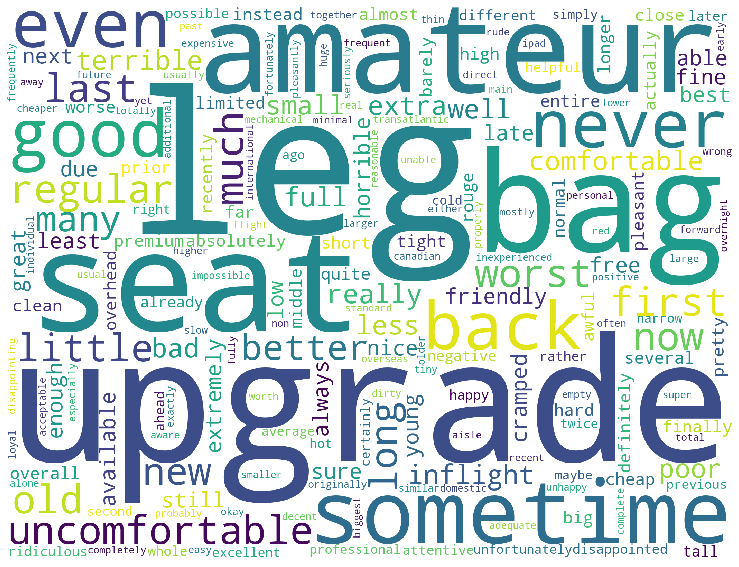

In [35]:
str_air1=' '.join([str(i) for i in most_common_air1])

wordcloud_united = WordCloud(stopwords=STOPWORDS,
                background_color='white',
                     width=2100,
                      height=1600
                     ).generate(str_air1)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud_united)
plt.axis('off')
plt.show()

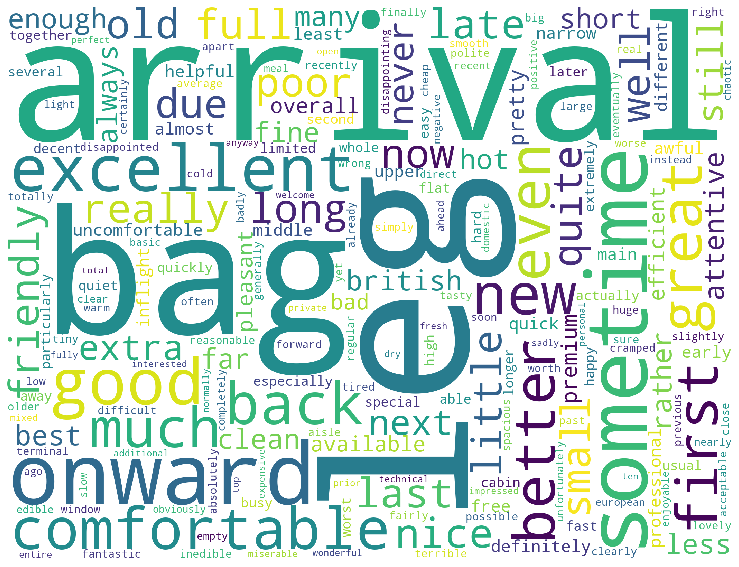

In [36]:
str_air2=' '.join([str(i) for i in most_common_air2])

wordcloud_united = WordCloud(stopwords=STOPWORDS,
                background_color='white',
                     width=2100,
                      height=1600
                     ).generate(str_air2)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud_united)
plt.axis('off')
plt.show()

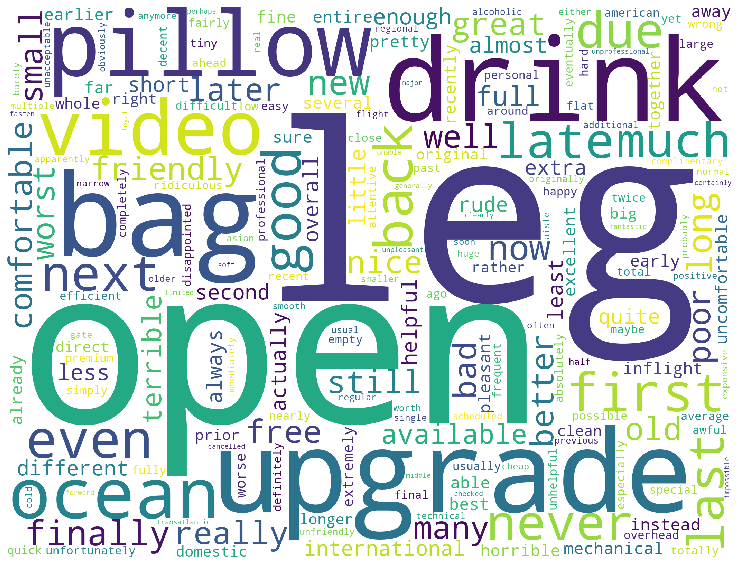

In [202]:
str_air3=' '.join([str(i) for i in most_common_air3])

wordcloud_united = WordCloud(stopwords=STOPWORDS,
                background_color='white',
                     width=2100,
                      height=1600
                     ).generate(str_air3)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud_united)
plt.axis('off')
plt.show()